In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#1. Check if GPU is enabled
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
mushrooms = pd.read_csv('data/mushrooms.csv', encoding = "ISO-8859-1")

In [4]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])

In [7]:
# Separating features and labels
x = mushrooms.drop(["class"],axis=1) #features
y = mushrooms["class"].values # labels

In [8]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y,test_size = 0.3,random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state = 1)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Plot loss function

def plotter(tr_model):
  plt.plot(tr_model.history['accuracy'], color = "blue", label = "train")
  plt.plot(tr_model.history['val_accuracy'], color = "red", label = "validation")

  plt.title("Learning curves")
  plt.ylabel("Accuracy")
  plt.xlabel("Number of epochs")
  plt.grid()
  plt.legend()
  plt.show()

In [15]:
# verify shapes are correct
x_train.shape

(5686, 22)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 184       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
356/356 [==============================] - 4s 6ms/step - loss: 0.5947 - accuracy: 0.6764 - val_loss: 0.4463 - val_accuracy: 0.8089
Epoch 2/50
356/356 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8531 - val_loss: 0.3000 - val_accuracy: 0.8884
Epoch 3/50
356/356 [==================

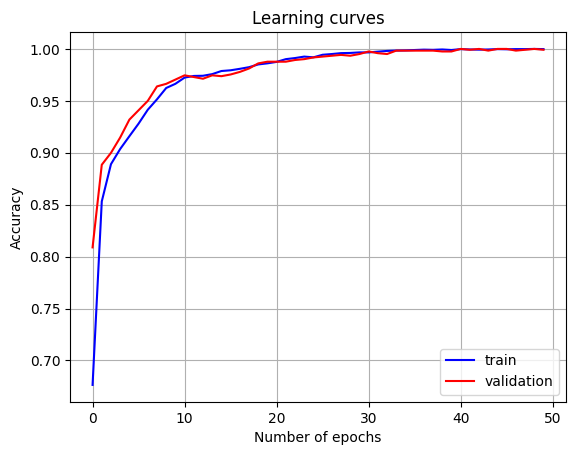

In [16]:
#Build ANN model
import time

model = Sequential()

model.add(Dense(8, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
start = time.time()
trained_model = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_data = (x_val, y_val), verbose=1)
end = time.time()
num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")
plotter(trained_model)

In [18]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.0020
Test accuracy: 99.92


In [24]:
model.predict(x_test)

39/39 [==============================] - 0s 4ms/step


array([[0.9999104 ],
       [0.9999573 ],
       [0.99999905],
       ...,
       [1.        ],
       [1.        ],
       [0.9999461 ]], dtype=float32)

In [25]:
# Create a function which takes a model and prints various evaluation metrics

import seaborn as sns
from sklearn import metrics

def evaluate(mlp, titlemsg):
  y_predicted = mlp.predict(x_test)
  y_predicted = y_predicted > 0.5
  mat = metrics.confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  plt.title(titlemsg)

39/39 [==============================] - 0s 2ms/step


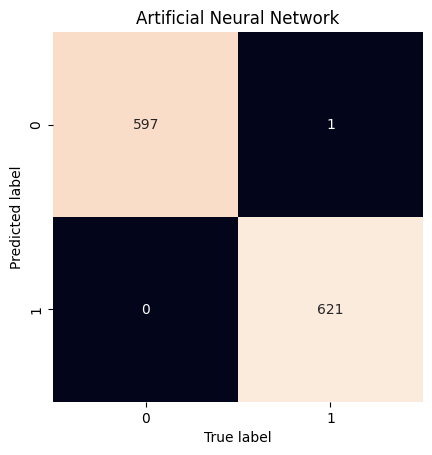

In [26]:
evaluate(model, "Artificial Neural Network")